# 1. 선 그래프 (Line plot) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

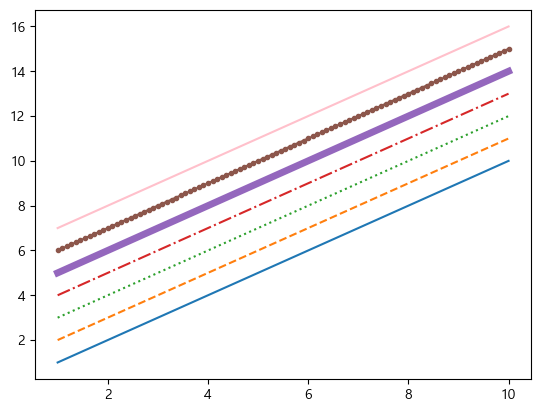

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.linspace(1, 10, num = 100)
x2 = pd.Series(x)

# plt 함수를 이용해서 Line Plot 그리기
plt.plot(x, x)
plt.plot(x, x+1, linestyle = "--")
plt.plot(x, x+2, linestyle = ":")
plt.plot(x, x+3, linestyle = "-.")
plt.plot(x, x+4, linewidth = 5)
plt.plot(x, x+5, marker = '.')
plt.plot(x, x+6, color = "pink")
plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [14]:
df = pd.read_csv("data/서울시 연도별 황사 경보발령 현황.csv")
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


In [18]:
# 최대농도(㎍/㎥/시) column name을 이용하기 편리하게 단순하게 바꾼다.
df.rename(columns = {"최대농도(㎍/㎥/시)":"최대농도"}, inplace = True)
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


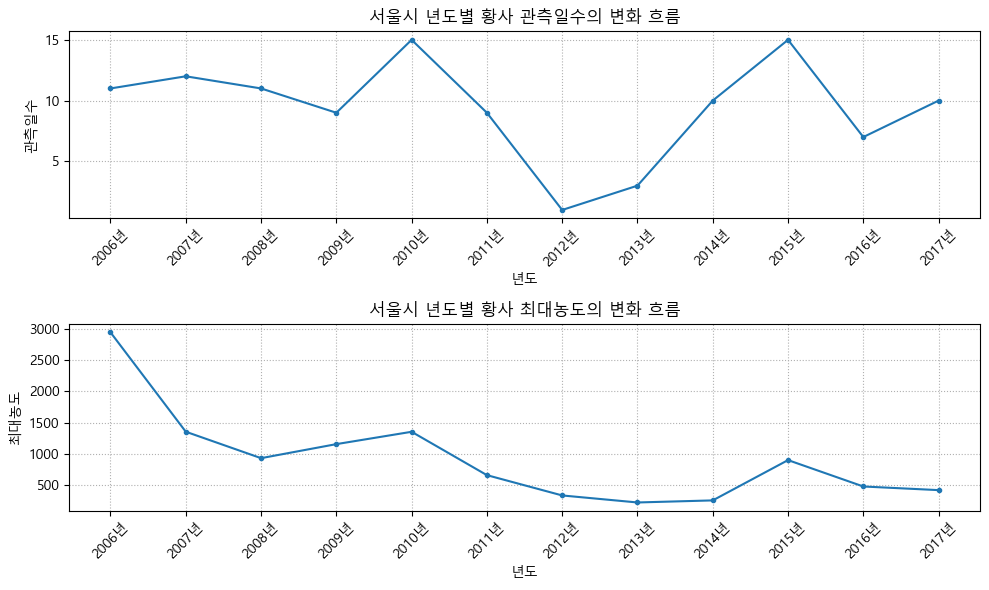

In [61]:
plt.figure(figsize = (10, 6))

plt.subplot(2, 1, 1)
plt.plot(df["년도"], df["관측일수"], marker = ".")
plt.title("서울시 년도별 황사 관측일수의 변화 흐름")
plt.xlabel("년도", fontsize = 10)
plt.ylabel("관측일수", fontsize = 10)
plt.grid(True, linestyle = ":")
plt.xticks(df["년도"],
           labels = [str(y)+"년" for y in df["년도"]], 
           rotation = 45)

plt.subplot(2, 1, 2)
plt.plot(df["년도"], df["최대농도"], marker = ".")
plt.title("서울시 년도별 황사 최대농도의 변화 흐름")
plt.xlabel("년도", fontsize = 10)
plt.ylabel("최대농도", fontsize = 10)
plt.grid(True, linestyle = ":")
plt.xticks(df["년도"],
           labels = [str(y)+"년" for y in df["년도"]], 
           rotation = 45)


plt.tight_layout()
plt.show()

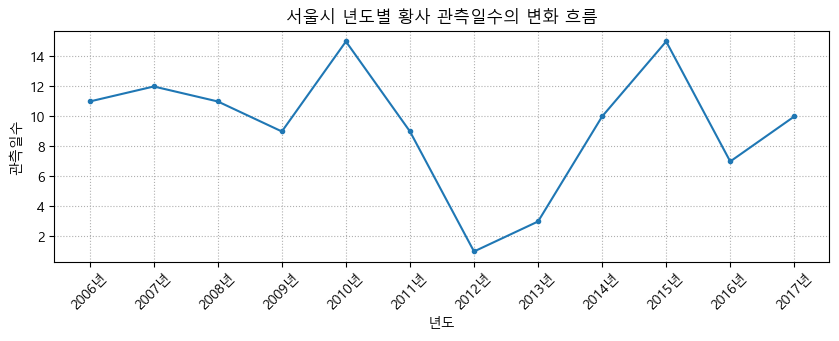

In [42]:
plt.figure(figsize = (10, 3))
plt.plot(df["년도"], df["관측일수"], marker = ".")
plt.title("서울시 년도별 황사 관측일수의 변화 흐름")
plt.xlabel("년도", fontsize = 10)
plt.ylabel("관측일수", fontsize = 10)
plt.grid(True, linestyle = ":")
plt.xticks(df["년도"],
           labels = [str(y)+"년" for y in df["년도"]], 
           rotation = 45)
plt.show()

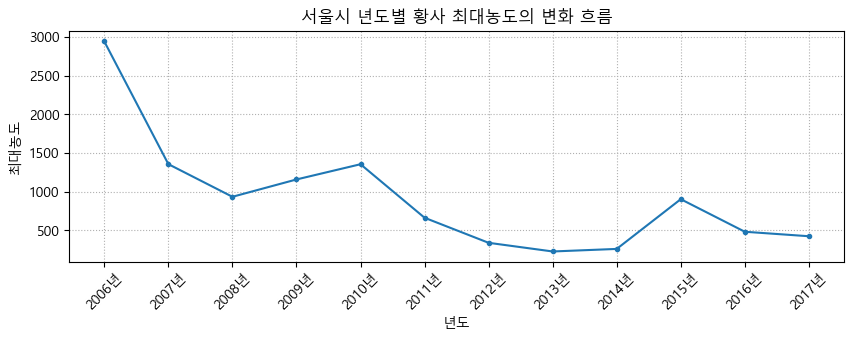

In [41]:
# time series data를 그래프로 그릴 때는 주로 x 축에 시간의 흐름을 위치시키고 y 축에 그에 따른 값을 위치시킨다.
# 그리고 가로로 긴 형태가 그래프를 time series data 그래프를 보기에 좀 더 편리하다.
# 똑같은 data이더라도 visualization을 어떻게 하느냐에 따라 다른 효과를 낼 수 있음에 주의한다.

plt.figure(figsize = (10, 3))
plt.plot(df["년도"], df["최대농도"], marker = ".")
plt.title("서울시 년도별 황사 최대농도의 변화 흐름")
plt.xlabel("년도", fontsize = 10)
plt.ylabel("최대농도", fontsize = 10)
plt.grid(True, linestyle = ":")
plt.xticks(df["년도"],
           labels = [str(y)+"년" for y in df["년도"]], 
           rotation = 45)
plt.show()

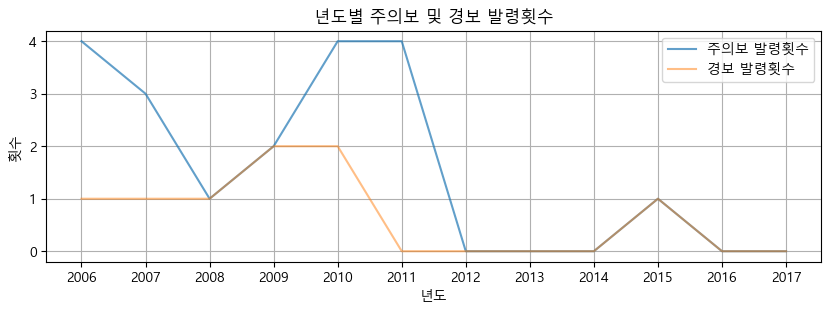

In [47]:
# 년도에 따른 주의보 / 경보 발령 횟수의 변화를 하나의 subplot에 같이 그려보자.
plt.figure(figsize = (10, 3))

plt.plot(df["년도"], df["주의보 발령횟수"], alpha = 0.7, label = "주의보 발령횟수")
plt.plot(df["년도"], df["경보 발령횟수"], alpha = 0.5, label = "경보 발령횟수")

plt.title("년도별 주의보 및 경보 발령횟수")
plt.xlabel("년도")
plt.ylabel("횟수")

plt.legend()
plt.grid(True)
plt.xticks(df["년도"])

plt.show()

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

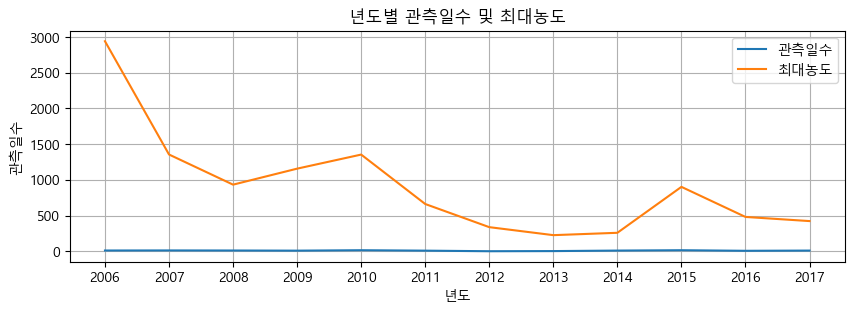

In [54]:
plt.figure(figsize = (10, 3))

plt.plot(df["년도"], df["관측일수"], label = "관측일수")
plt.plot(df["년도"], df["최대농도"], label = "최대농도")

plt.title("년도별 관측일수 및 최대농도")
plt.xlabel("년도")
plt.ylabel("관측일수")

plt.legend()
plt.grid(True)
plt.xticks(df["년도"])

plt.show()

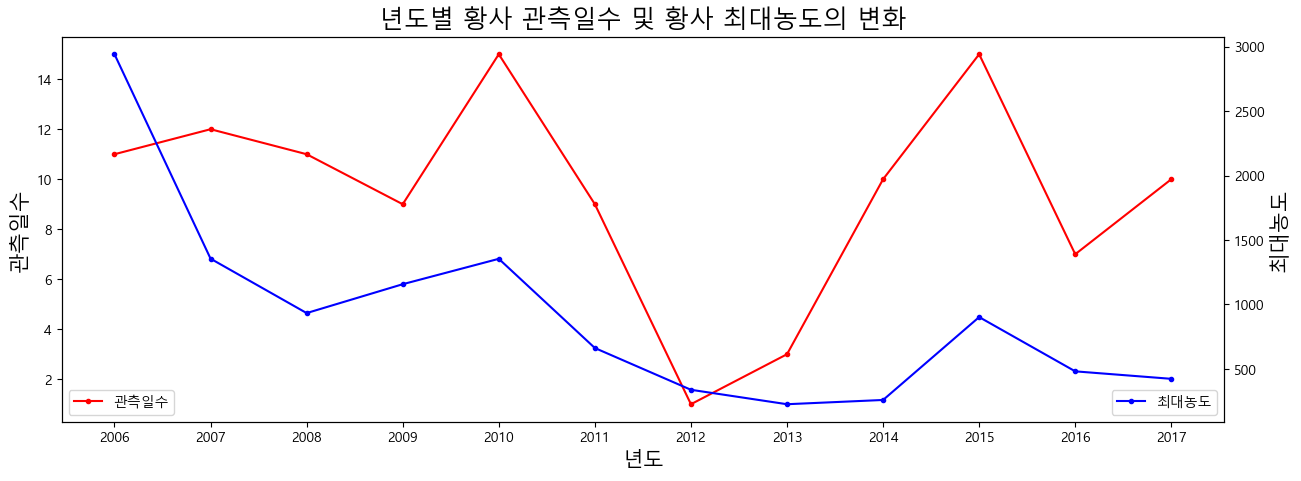

In [86]:
plt.figure(figsize = (15, 5))

ax1 = plt.gca()     # 관측일수에 대한 axes
ax2 = ax1.twinx()   # ax1과 x축을 공유하는 새로운 subplot 생성. 최대농도에 대한 axes.

ax1.plot(df["년도"], df["관측일수"], label = "관측일수", color = "r", marker = ".")
ax2.plot(df["년도"], df["최대농도"], label = "최대농도", color = "b", marker = ".")

ax1.set_title("년도별 황사 관측일수 및 황사 최대농도의 변화", fontsize = 18)
ax1.set_xlabel("년도", fontsize = 15)

ax1.set_ylabel("관측일수", fontsize = 15)
ax2.set_ylabel("최대농도", fontsize = 15)

ax1.legend(loc = "lower left")
ax2.legend(loc = "lower right")
ax1.set_xticks(df["년도"])

plt.show()

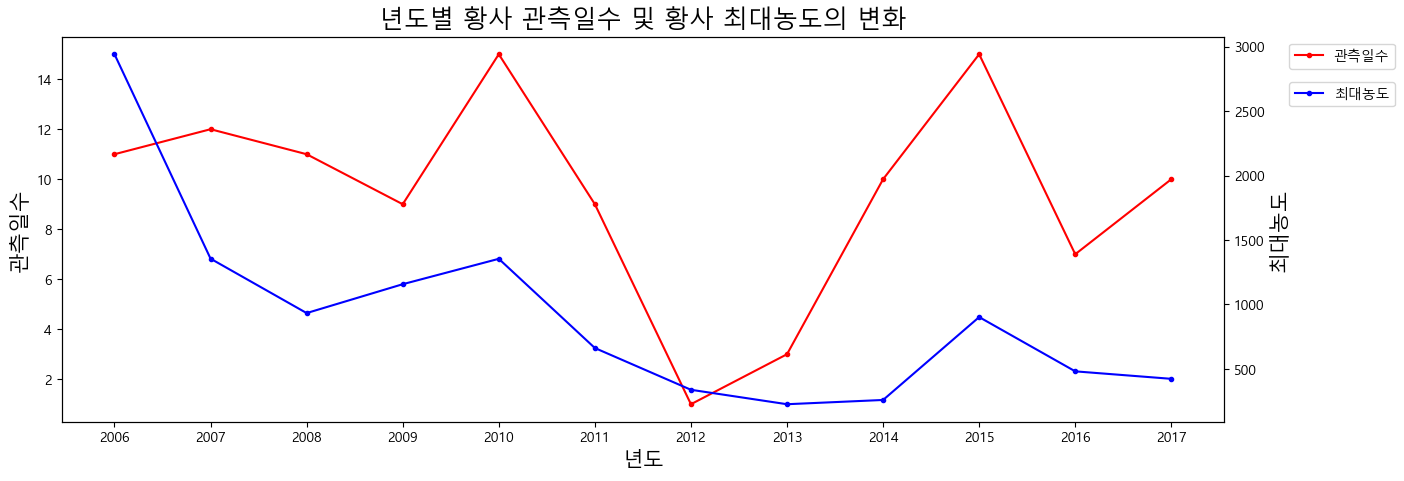

In [108]:
plt.figure(figsize = (15, 5))

ax1 = plt.gca()     # 관측일수에 대한 axes
ax2 = ax1.twinx()   # ax1과 x축을 공유하는 새로운 subplot 생성. 최대농도에 대한 axes.

ax1.plot(df["년도"], df["관측일수"], label = "관측일수", color = "r", marker = ".")
ax2.plot(df["년도"], df["최대농도"], label = "최대농도", color = "b", marker = ".")

ax1.set_title("년도별 황사 관측일수 및 황사 최대농도의 변화", fontsize = 18)
ax1.set_xlabel("년도", fontsize = 15)

ax1.set_ylabel("관측일수", fontsize = 15)
ax2.set_ylabel("최대농도", fontsize = 15)

ax1.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
ax2.legend(bbox_to_anchor = (1.05, 0.9), loc = "upper left")
ax1.set_xticks(df["년도"])

plt.show()

In [ ]:
# 이는 ax1과 ax2가 겹쳐서 나오는 것이다. 
# 그래서 title은 ax1과 ax2 둘 중 하나에만 설정해도 된다. 어차피 겹쳐서 나오기 때문이다.
# 이때 주의할 점은 ax1과 ax2는 하나의 instanc라는 점이다. 그래서 method를 쓸 때 꼭 앞에 set_을 붙여야 한다.

# legend를 지정할 때 역시 둘을 따로 해야한다.
# 이때 위치에 대한 설정을 하지 않을 경우 각 axes에 대한 legend는 겹쳐서 나온다. 그래서 legend의 loc parameter를 이요해
# 직접 설정해 줄 필요가 있다.

# legend의 위치 설정 방법
# 방법 1. 미리 지정된 위치로 설정
# legend(loc = "상하위치 좌우위치")
# 상하: upper, center, lower
# 좌우: left, center, right
# 정중앙: center
# 기본값: best - 자동으로 그래프와 겹치지 않도록 최적의 위치를 설정한다.

# 방법 2. legend의 위치를 직접 설정
# legend(bbox_to_anchor = (x, y), loc = "box의 상하, 좌우 위치")
# bbox_to_anchor
# legend box의 위치를 지정한다.
# 전체 subplot의 x축과 y축의 비율을 입력한다.
# 하단: (0, 0) ~ (1, 0)
# 상단: (0, 1) ~ (1, 1)
# 1보다 크게 설정하면 legend를 axes 밖에 위치시키겠다는 뜻이다.
# loc
# bbox_to_anchor 좌표 지점에 legend box의 어느 지점을 붙일 것인지를 지정한다.
# ex) legend(bbox_to_anchor = (1, 1), loc = "upper left") -> subplot의 (1, 1) 지점에 legend box의 상/좌 점을 맞춘다.

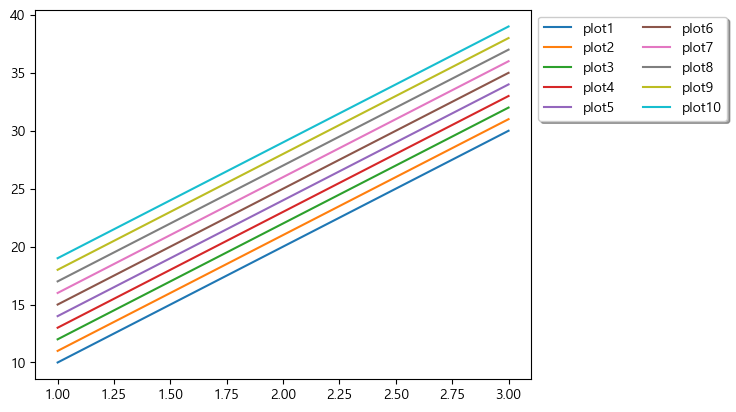

In [114]:
x = [1, 2, 3]
y = np.array([10, 20, 30])

plt.plot(x, y, label = "plot1")
plt.plot(x, y+1, label = "plot2")
plt.plot(x, y+2, label = "plot3")
plt.plot(x, y+3, label = "plot4")
plt.plot(x, y+4, label = "plot5")
plt.plot(x, y+5, label = "plot6")
plt.plot(x, y+6, label = "plot7")
plt.plot(x, y+7, label = "plot8")
plt.plot(x, y+8, label = "plot9")
plt.plot(x, y+9, label = "plot10")

plt.legend(bbox_to_anchor = (1, 1), loc = "upper left", 
          ncol = 2, shadow = True)

plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

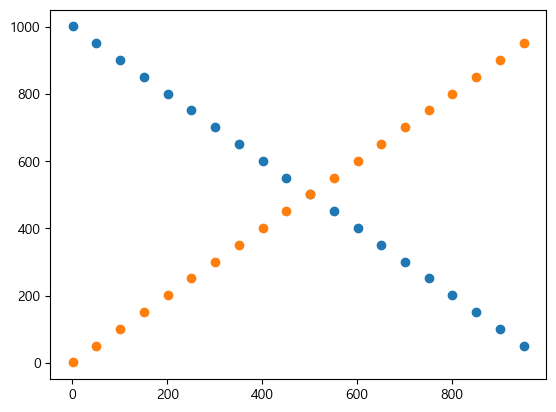

In [115]:
x = range(1, 1001, 50)
y1 = range(1001, 1, -50)
y2 = range(1, 1001, 50)

plt.scatter(x, y1)
plt.scatter(x, y2)

plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 정수: 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

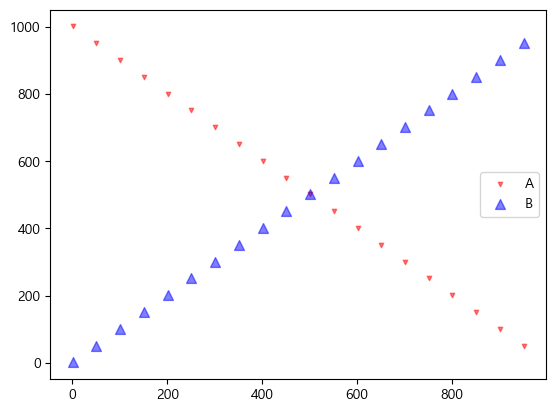

In [124]:
x = range(1, 1001, 50)
y1 = range(1001, 1, -50)
y2 = range(1, 1001, 50)

plt.scatter(x, y1, marker = "v", color = "r", alpha = 0.5, s = 10, label = "A")
plt.scatter(x, y2, marker = "^", color = "b", alpha = 0.5, s = 50, label = "B")

plt.legend()
plt.show()

## 2.3 산점도 활용

In [125]:
# Scatter Plot에 사용할 data를 불러온다.

df = pd.read_csv("data/diamonds.csv")

###  캐럿(carat)과 가격(Price)간의 상관관계 시각화

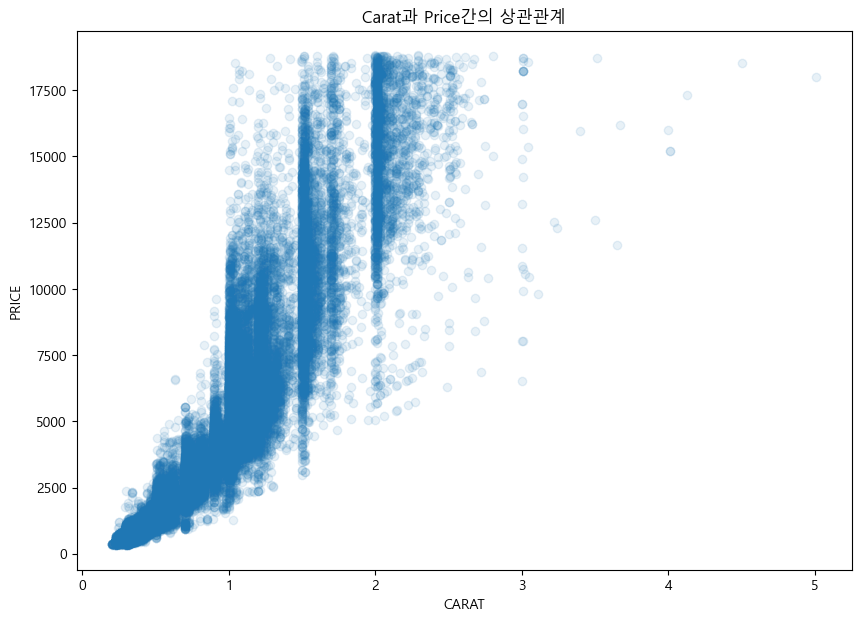

In [130]:
# 보통 scatter plot은 x 축에는 원인이 되는 값을 놓고 y 축에는 결과가 되는 값을 놓는다.
# 여기서는 carat이 변할 때 이에 따라 price는 어떻게 변하는지 알고자 한다.
# 그래서 x 축에 carat을 놓고, y 축에는 price를 놓는다.

x = df["carat"]
y = df["price"]

plt.figure(figsize = (10, 7))

plt.scatter(x, y, alpha = 0.1)

plt.title("Carat과 Price간의 상관관계")
plt.xlabel("CARAT")
plt.ylabel("PRICE")

plt.show()

> - 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - 양수: 양의 상관관계(비례관계), 음수: 음의 상관관계(반비례관계)
>             - 양: 0 ~ 1,  음: -1 ~ 0
>         - 절대값 기준 1로 갈수록 강한상관관계, 0으로 갈수록 약한 상관관계
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

In [131]:
df[["carat", "price"]].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

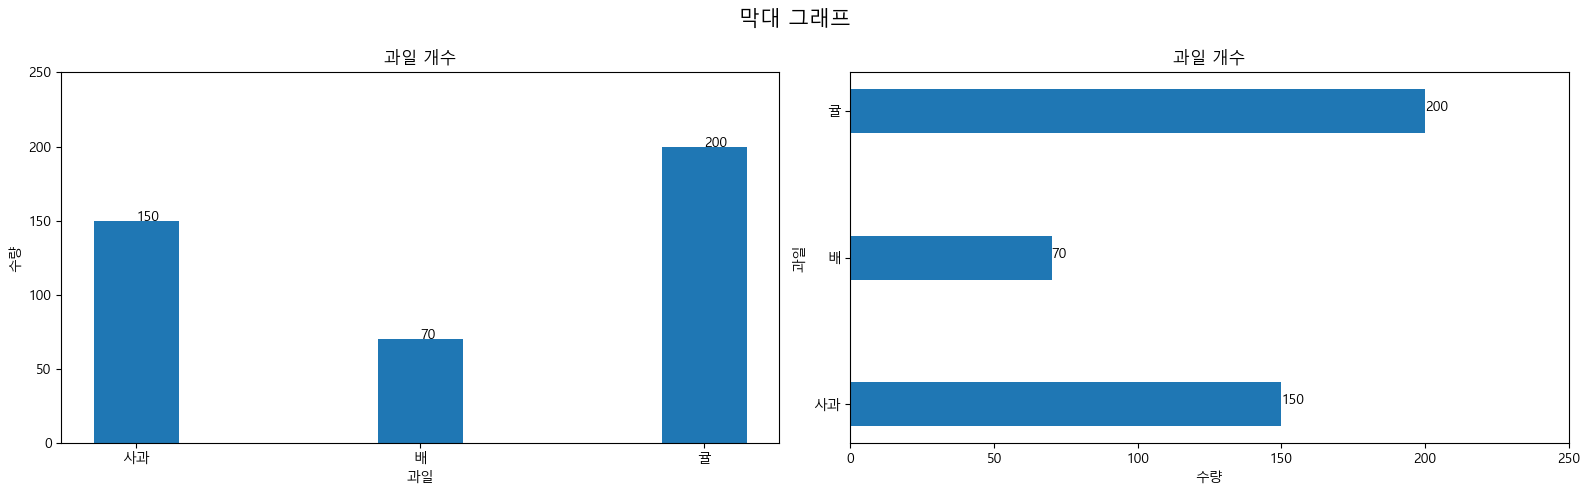

In [166]:
fruits = ['사과', '배', '귤']
counts = [150, 70, 200]

plt.figure(figsize = (16, 5))

plt.subplot(1, 2, 1)
plt.bar(fruits, counts, width = 0.3)
for x, y in enumerate(counts):
    plt.text(x, y, str(y))
plt.ylim(0, 250)
plt.title('과일 개수')
plt.xlabel('과일')
plt.ylabel('수량')


plt.subplot(1, 2, 2)
plt.barh(fruits, counts, height = 0.3)
for x, y in enumerate(counts):
    plt.text(y, x, str(y))
plt.xlim(0, 250)
plt.title('과일 개수')
plt.xlabel('수량')
plt.ylabel('과일')

plt.suptitle('막대 그래프', fontsize = 15)
plt.tight_layout()
plt.show()

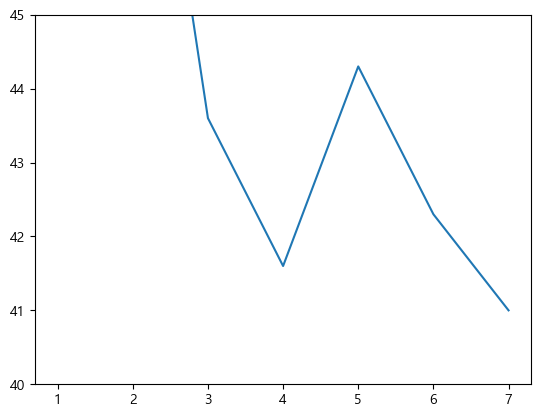

In [171]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [100.0, 50.3, 43.6, 41.6, 44.3, 42.3, 41.0]

plt.plot(x, y)
plt.ylim(40, 45)

plt.show()

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)

In [256]:
df = pd.read_excel('data/강수량.xlsx')
df.set_index('계절', inplace = True)
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


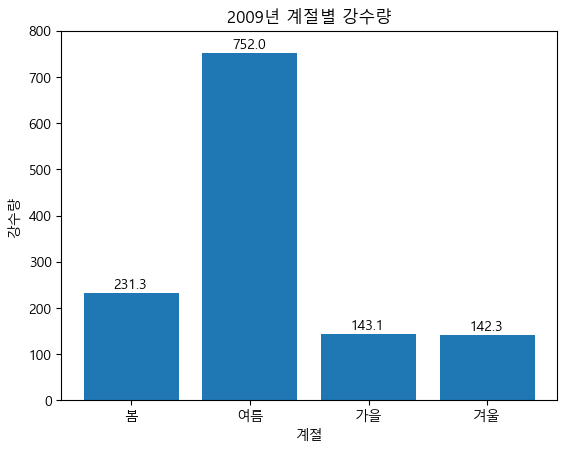

In [257]:
# 2009년도 계절별 강수량

plt.bar(df.index, df[2009])
plt.title('2009년 계절별 강수량')
plt.ylim(0, 800)
for x, y in enumerate(df[2009]):
    plt.text(x - 0.15, y+10, str(y))
plt.xlabel('계졀')
plt.ylabel('강수량')

plt.show()

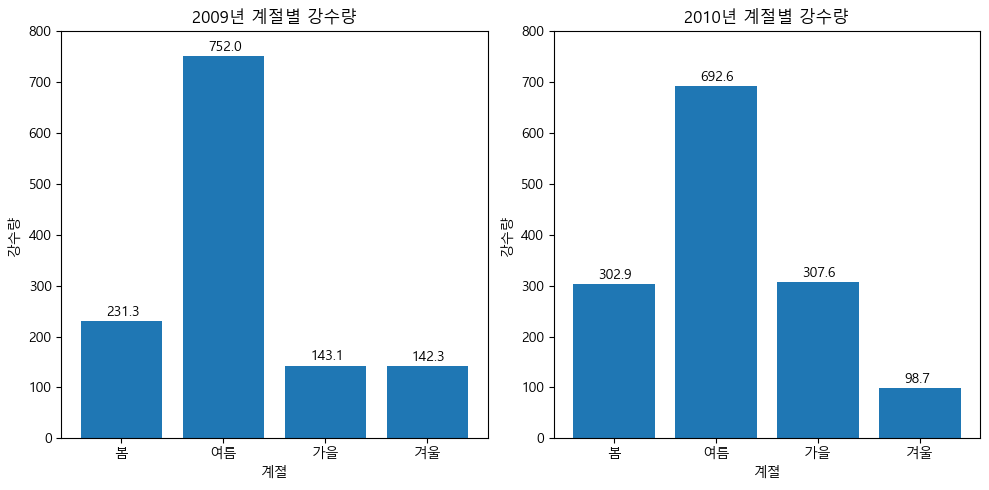

In [258]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.bar(df.index, df[2009])
plt.title('2009년 계절별 강수량')
plt.ylim(0, 800)
for x, y in enumerate(df[2009]):
    plt.text(x - 0.15, y+10, str(y))
plt.xlabel('계졀')
plt.ylabel('강수량')

plt.subplot(1, 2, 2)
plt.bar(df.index, df[2010])
plt.title('2010년 계절별 강수량')
plt.ylim(0, 800)
for x, y in enumerate(df[2010]):
    plt.text(x - 0.15, y+10, str(y))
plt.xlabel('계졀')
plt.ylabel('강수량')

plt.tight_layout()
plt.show()

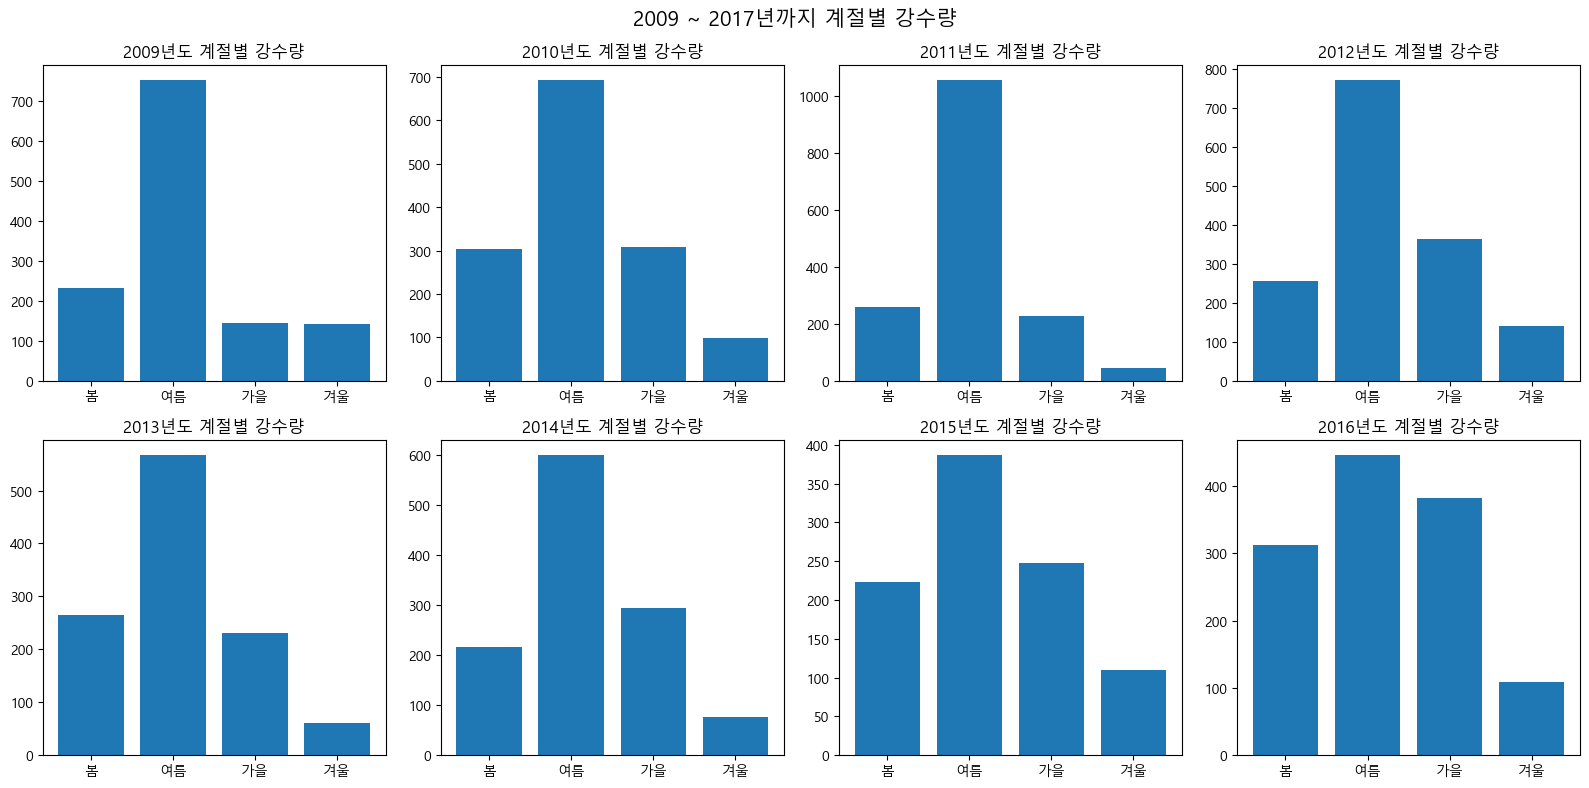

In [209]:
plt.figure(figsize = (16, 8))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.bar(df.index, df[2009+i])
    plt.title(f'{2009+i}년도 계절별 강수량')

plt.suptitle("2009 ~ 2017년까지 계절별 강수량", fontsize = 15)
plt.tight_layout()
plt.show()

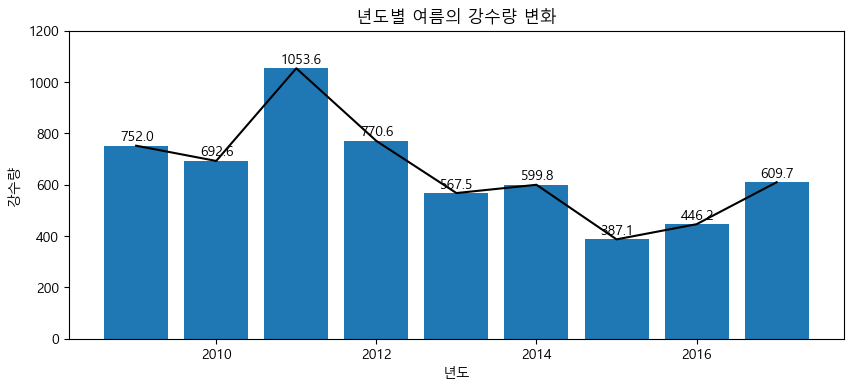

In [227]:
# 년도별 여름의 강수량 변화를 그래프로 그려보자.
# 이때는 값의 비교보다는 값의 변화 흐름을 알고자 하는 것이므로 line plot을 이용한다.

plt.figure(figsize = (10, 4))
plt.plot(df.columns, df.loc['여름'], color = 'k')
plt.bar(df.columns, df.loc['여름'])
plt.ylim(0, 1200)
for x, y in zip(df.columns, df.loc['여름']):
    plt.text(x-0.2, y+20, str(y))
plt.title('년도별 여름의 강수량 변화')
plt.xlabel('년도')
plt.ylabel('강수량')

plt.show()

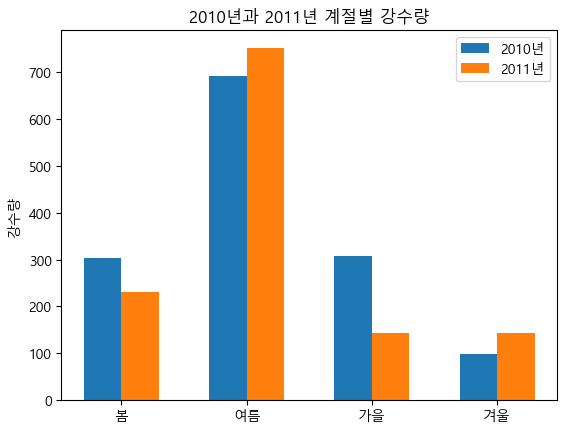

In [272]:
# 참고
# 2010년과 2011 년도 계절별 강수량을 확인해보자.
# 이때 누적 bar plot을 이용해보자.

width = 0.3
x = np.arange(4)

plt.bar(x-width/2, df[2010], width = width, label = '2010년')
plt.bar(x+width/2, df[2009], width = width, label = '2011년')

plt.xticks(x, labels = df.index)

plt.title('2010년과 2011년 계절별 강수량')
plt.ylabel('강수량')

plt.legend()
plt.show()